In [85]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN
import matplotlib.pyplot as plt


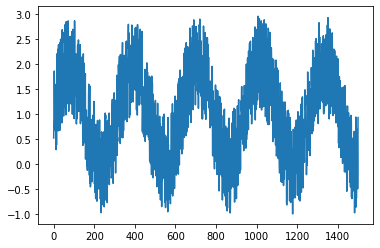

In [86]:
t=np.arange(0,1500)
x=np.sin(0.02*t)+np.random.rand(1500)*2
plt.plot(x)
plt.show()

In [87]:
train,test=x[0:1000],x[1000:]


In [88]:
step=10

def convertToDataset(data,step):
  X=[]
  Y=[]
  for i in range(len(data)-step):
    d=i+step
    X.append(data[i:d,])
    Y.append(data[d,])

  return np.array(X),np.array(Y)
trainX,trainY=convertToDataset(train,step)
testX,testY=convertToDataset(test,step)  


In [89]:
print(trainX.shape)
print(testX.shape)

(990, 10)
(490, 10)


In [90]:
#NumberOfSequence,TimeSteps,ElementPerStep
#990,10,1
trainX=np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1))
testX=np.reshape(testX,(testX.shape[0],testX.shape[1],1))


In [91]:
print(trainX.shape)
print(testX.shape)

(990, 10, 1)
(490, 10, 1)


In [92]:
model=Sequential()

#units=number of neurons of hidden state
model.add(SimpleRNN(units=64,input_shape=(None,1),activation='tanh'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='rmsprop')



In [93]:
history=model.fit(trainX,trainY,epochs=20,batch_size=16,verbose=2)

Epoch 1/20
62/62 - 1s - loss: 0.4381
Epoch 2/20
62/62 - 0s - loss: 0.3979
Epoch 3/20
62/62 - 0s - loss: 0.3953
Epoch 4/20
62/62 - 0s - loss: 0.3938
Epoch 5/20
62/62 - 0s - loss: 0.3871
Epoch 6/20
62/62 - 0s - loss: 0.3842
Epoch 7/20
62/62 - 0s - loss: 0.3784
Epoch 8/20
62/62 - 0s - loss: 0.3790
Epoch 9/20
62/62 - 0s - loss: 0.3742
Epoch 10/20
62/62 - 0s - loss: 0.3733
Epoch 11/20
62/62 - 0s - loss: 0.3666
Epoch 12/20
62/62 - 0s - loss: 0.3687
Epoch 13/20
62/62 - 0s - loss: 0.3591
Epoch 14/20
62/62 - 0s - loss: 0.3614
Epoch 15/20
62/62 - 0s - loss: 0.3628
Epoch 16/20
62/62 - 0s - loss: 0.3550
Epoch 17/20
62/62 - 0s - loss: 0.3609
Epoch 18/20
62/62 - 0s - loss: 0.3546
Epoch 19/20
62/62 - 0s - loss: 0.3520
Epoch 20/20
62/62 - 0s - loss: 0.3487


In [94]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 64)                4224      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [95]:
model.input

<KerasTensor: shape=(None, None, 1) dtype=float32 (created by layer 'simple_rnn_4_input')>

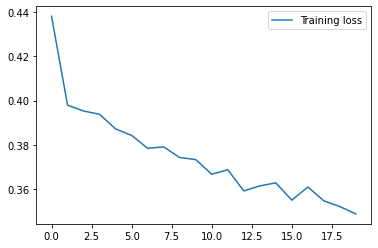

In [96]:
loss=history.history['loss']
plt.plot(loss,label='Training loss')
plt.legend()
plt.show()

In [97]:
trainScore=model.evaluate(trainX,trainY,verbose=0)
print(trainScore)

0.3350510895252228


In [98]:
trainPredict=model.predict(trainX)
testPredict=model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)


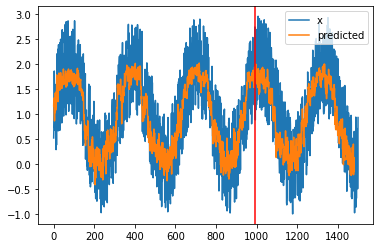

In [99]:
plt.plot(x,label='x')
plt.plot(predicted,label='predicted')
plt.axvline(len(trainX),c='r')
plt.legend()
plt.show()